In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [9]:
train = pd.read_parquet('data/train_10k_5.parquet')
test = pd.read_parquet('data/test_10k_5.parquet')

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

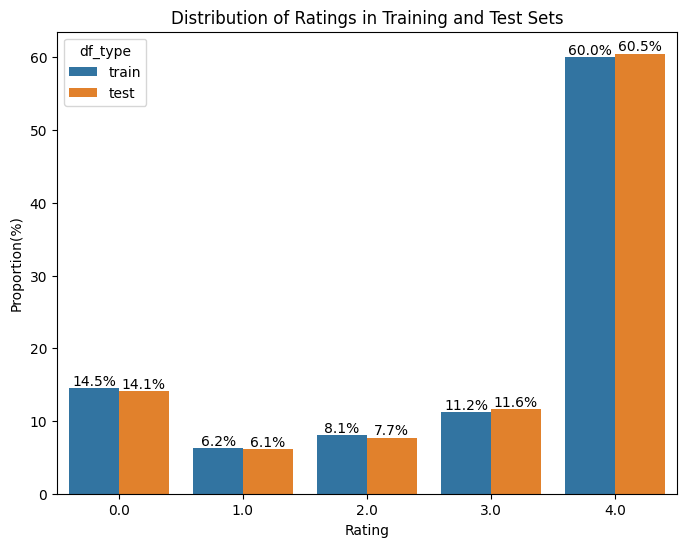

In [44]:
def get_distribution(df, label_col='rating'):
    distribution = df[label_col].value_counts(normalize=True).sort_index()*100
    return distribution.reset_index()

df_cube_train = get_distribution(train)
df_cube_train['df_type'] = 'train'
df_cube_test = get_distribution(test)
df_cube_test['df_type'] = 'test'

df_cube = pd.concat([df_cube_train, df_cube_test], axis=0).reset_index()
# # plot rating distribution in training set
plt.figure(figsize=(8,6))
ax = sns.barplot(data=df_cube, x='rating', y='proportion', hue='df_type')
plt.title('Distribution of Ratings in Training and Test Sets')
plt.xlabel('Rating')
plt.ylabel('Proportion(%)')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge')

container

In [29]:
help(sns.barplot)

Help on function barplot in module seaborn.categorical:

barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, seed=None, units=None, weights=None, orient=None, color=None, palette=None, saturation=0.75, fill=True, hue_norm=None, width=0.8, dodge='auto', gap=0, log_scale=None, native_scale=False, formatter=None, legend='auto', capsize=0, err_kws=None, ci=<deprecated>, errcolor=<deprecated>, errwidth=<deprecated>, ax=None, **kwargs)
    Show point estimates and errors as rectangular bars.

    A bar plot represents an aggregate or statistical estimate for a numeric
    variable with the height of each rectangle and indicates the uncertainty
    around that estimate using an error bar. Bar plots include 0 in the
    axis range, and they are a good choice when 0 is a meaningful value
    for the variable to take.

    See the :ref:`tutorial <categorical_tutorial>` for more information.

    .. note::
        By defa

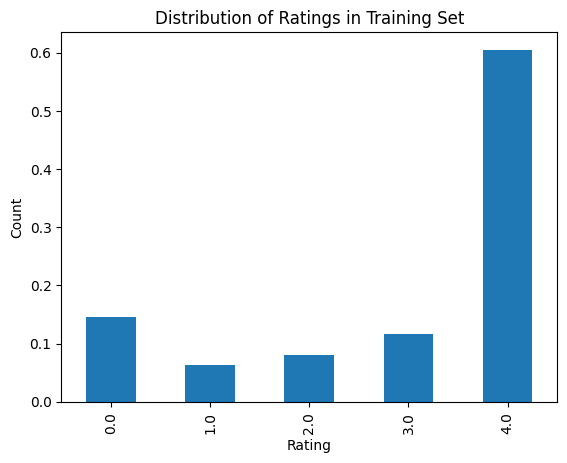

In [6]:
train['rating'].value_counts(normalize=True).sort_index().plot(kind='bar')
test['rating'].value_counts(normalize=True).sort_index().plot(kind='bar')
plt.title('Distribution of Ratings in Training Set')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()